# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import random
random.seed(42)

In [2]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-10-26 02:45:01--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2023-10-26 02:45:01 (37.4 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,718,104,52,110,172,53,10,219,30,25,166,235,711,218,74,10,28,188,198
1,759,94,50,84,138,57,10,156,44,20,170,171,351,187,77,5,6,182,191
2,703,93,43,78,162,64,8,137,48,18,145,156,281,159,63,17,12,203,210
3,637,86,44,65,129,56,6,152,45,19,150,168,331,177,83,4,13,178,183
4,766,98,38,78,191,65,8,169,39,20,136,197,430,141,67,9,20,192,199
5,366,90,47,85,149,60,10,155,43,19,155,179,355,186,75,1,5,185,196
6,77,86,40,62,140,62,7,150,45,19,133,165,330,173,82,2,3,180,185
7,36,82,44,72,118,52,7,152,44,19,147,174,340,177,82,2,2,180,185
8,565,101,48,85,191,60,11,175,38,21,153,192,458,187,62,5,22,197,210
9,101,95,42,85,174,66,9,153,44,19,144,168,347,150,65,11,5,196,204


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,407.526412,94.052823,45.156648,82.673953,170.571949,61.927140,8.548270,169.908925,40.663024,20.657559,148.595628,189.673953,445.681239,176.061931,72.271403,6.459016,12.755920,189.091075,195.790528
std,243.303499,8.266486,6.171888,15.665914,33.770382,7.974078,4.476616,33.409248,7.764633,2.596187,14.229879,31.412508,178.297746,32.763861,7.110258,4.819427,8.821971,6.068262,7.351562
min,0.000000,77.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,197.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,319.000000,151.000000,67.000000,3.000000,6.000000,185.000000,191.000000
50%,400.000000,93.000000,45.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,175.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,620.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,607.000000,200.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,182.000000,288.000000,987.000000,264.000000,119.000000,22.000000,40.000000,203.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
mean = np.mean(X_train, axis=0)
std_dev        = np.std(X_train, axis=0)
X_train_scaled = (X_train - mean) / std_dev
X_test_scaled  = (X_test  - mean) / std_dev


Нормализация позволяет избежать проблемы, когда один признак с большими значениями доминирует над другими признаками.
Без нормализации веса могут быть трудно интерпретировать, так как они будут зависеть от единиц измерения признаков.


This is typically done to ensure that features with different ranges or units do not dominate the learning process.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best Hyperparameters: {'C': 100}
Accuracy: 0.7777777777777778
F1 Score: 0.7786193496813315


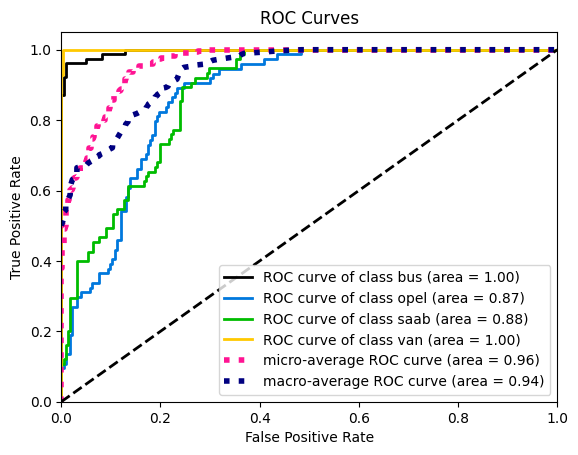

In [10]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt



logistic_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
}

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_log_params = grid_search.best_params_

best_logistic_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, **best_log_params)
best_logistic_reg.fit(X_train_scaled, y_train)

y_pred = best_logistic_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1       = f1_score(y_test, y_pred, average='macro')

print("Best Hyperparameters:", best_log_params)
print("Accuracy:",                accuracy)
print("F1 Score:",                      f1)

# Plot ROC curve (you need to have predicted probabilities for each class)
predicted_proba = best_logistic_reg.predict_proba(X_test_scaled)
plot_roc(y_test, predicted_proba)
plt.show()

In [9]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

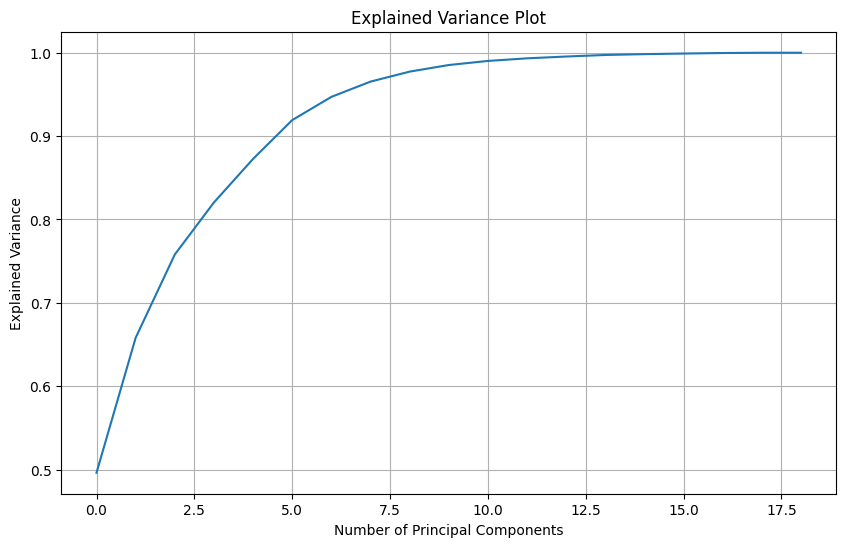

In [11]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Plot')
plt.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Как только мы достигаем 12 компонентов, дисперсия остается почти постоянной.
Нормализация гарантирует, что каждый признак вносит равный вклад в главные компоненты и предотвращает доминирование дисперсии признаков с большими масштабами.

In [12]:
### YOUR CODE HERE

pca = PCA(n_components=12)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'logistic__C': 10}
Accuracy: 0.7306397306397306
F1 Score: 0.7300694159333108


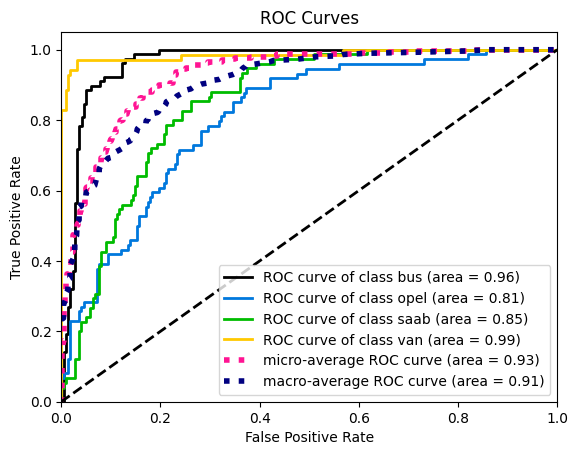

In [15]:
### YOUR CODE HERE

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('pca', PCA(n_components=12)),
    ('logistic', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_model  = grid_search.best_estimator_

y_pred = best_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

predicted_proba = best_model.named_steps['logistic'].predict_proba(X_test_pca)
plot_roc(y_test, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best Max Depth: {'decision__max_depth': 9}
Accuracy: 0.5723905723905723
F1 Score: 0.5748376326369968


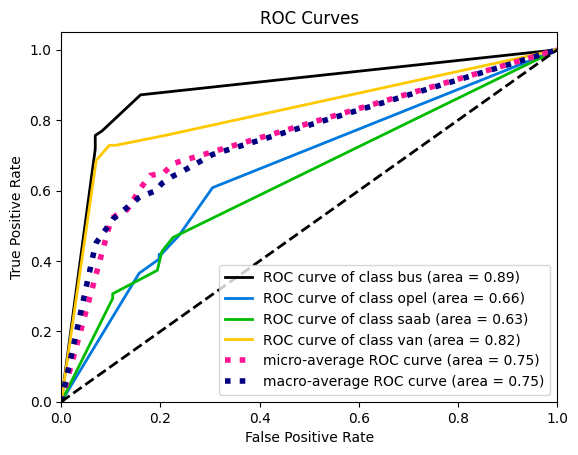

In [22]:
from sklearn.tree import DecisionTreeClassifier

random.seed(42)
# YOUR CODE HERE
param_grid = {
    'decision__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

pipeline = Pipeline([
    ('pca', PCA(n_components=12)),
    ('decision', DecisionTreeClassifier())
])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train_pca, y_train)

best_tree_params = grid_search.best_params_
best_tree        = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("Best Max Depth:", best_tree_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

predicted_proba = best_tree.named_steps['decision'].predict_proba(X_test_pca)
plot_roc(y_test, predicted_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

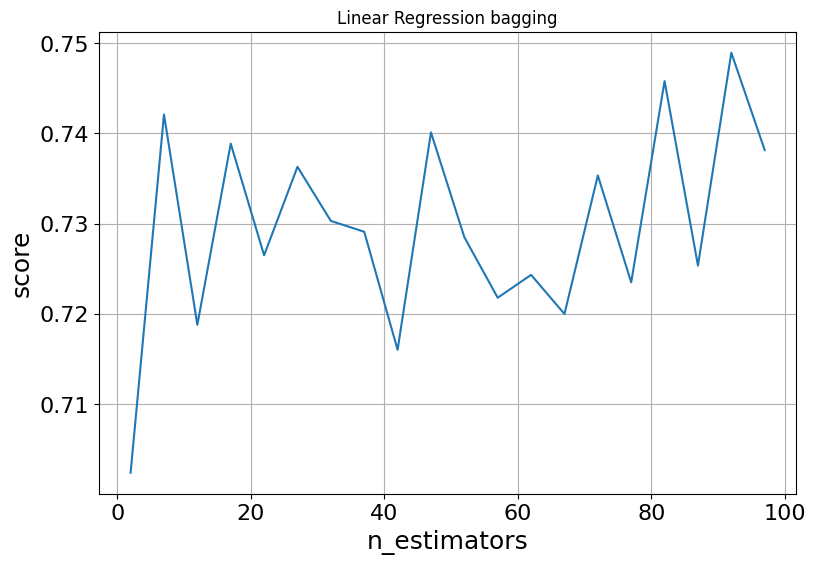

In [29]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

best_params = {'max_depth': 9, 'C': 10}


estimator_range = np.arange(2, 100, 5)

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(estimator=LogisticRegression(C=best_params['C'], multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000), n_estimators=n_estimators)
    clf.fit(X_train_pca, y_train)

    models.append(clf)
    scores.append(f1_score(y_pred=clf.predict(X_test_pca), y_true=y_test, average='macro'))

best_clf = models[int(np.argmax(np.array(scores)))]

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.title("Linear Regression bagging")
plt.grid(True)

plt.show()


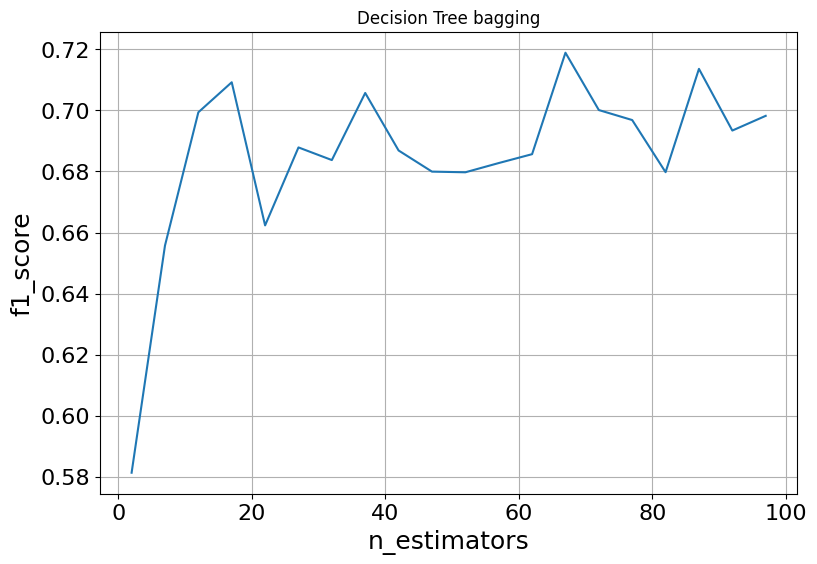

In [27]:
models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=best_params['max_depth']), n_estimators=n_estimators)
    clf.fit(X_train_pca, y_train)

    models.append(clf)
    scores.append(f1_score(y_pred=clf.predict(X_test_pca), y_true=y_test, average='macro'))

best_clf = models[int(np.argmax(np.array(scores)))]

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("f1_score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.title("Decision Tree bagging")
plt.grid(True)
plt.show()

наверно, пока размер ансамбля еще мал, глубина дерева подобранная в пункте 2.5 не является оптимальной, однако начиная с определенного количества, ансамбль может лучше аппроксимировать сложные закономерности в данных, поэтому найденное значение подойдет

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

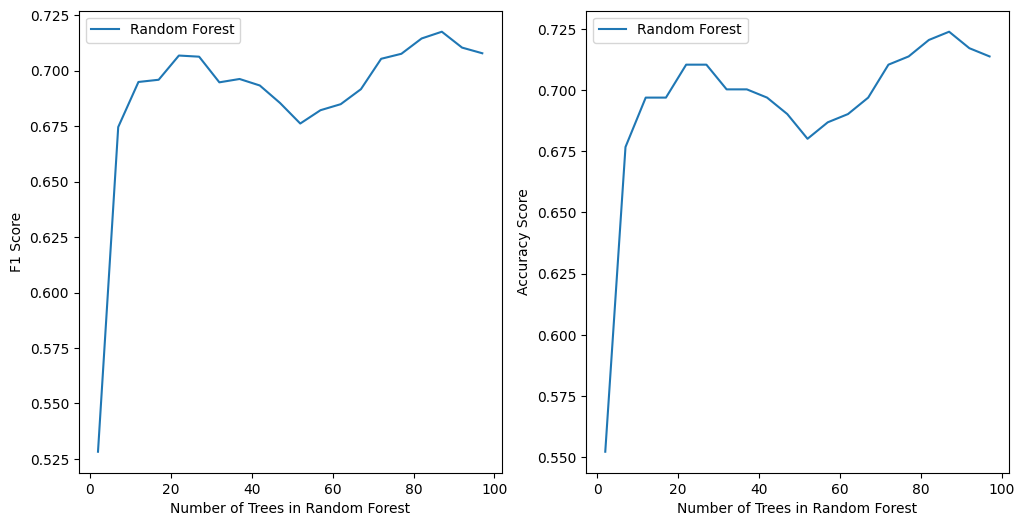

In [30]:
from sklearn.ensemble import RandomForestClassifier

n_trees_range = range(2, 101, 5)

f1_scores_rf = []
accuracy_scores_rf = []

for n_trees in n_trees_range:
    random_forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    random_forest.fit(X_train_pca, y_train)
    y_pred_rf = random_forest.predict(X_test_pca)
    f1_scores_rf.append(f1_score(y_test, y_pred_rf, average='macro'))
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred_rf))

# Plot F1 and accuracy scores for Random Forest
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_trees_range, f1_scores_rf, label='Random Forest')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_trees_range, accuracy_scores_rf, label='Random Forest')
plt.xlabel('Number of Trees in Random Forest')
plt.ylabel('Accuracy Score')
plt.legend()

plt.show()


схожесть в оптимальных числах деревьев между Random Forest, ансамблем линейной регрессии и ансамблем решающих деревьев может быть объяснена балансом между смещением и разбросом моделей, а также сложностью данных, с которыми они работают.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

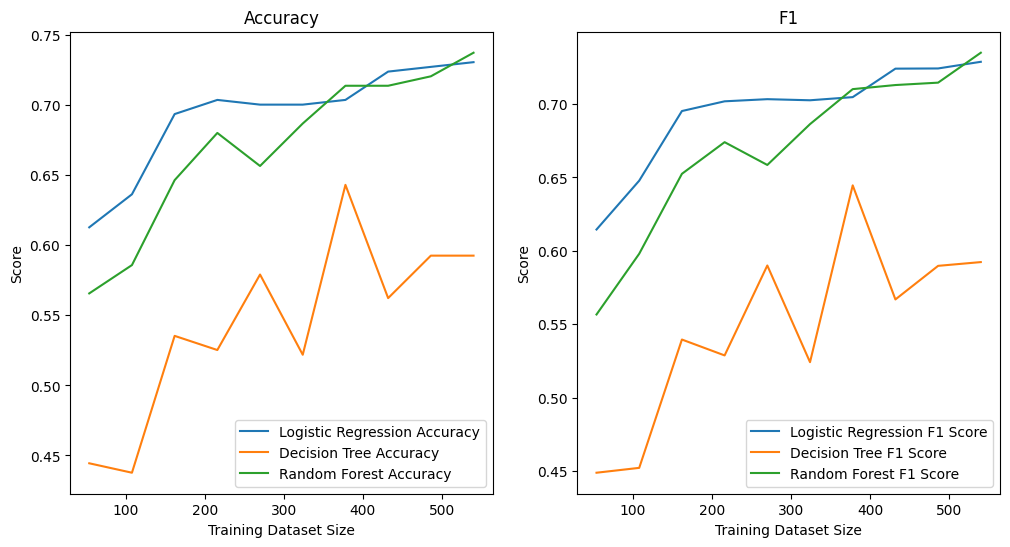

In [31]:
# YOUR CODE HERE

decision_tree_params = {
    'max_depth': 9,
}

logistic_regression_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol':1e-3,
    'max_iter': 1000,
    'C': 10,
}

random_forest_params = {
    'n_estimators': 90,
}

models = [
    ('Logistic Regression', LogisticRegression(**logistic_regression_params)),
    ('Decision Tree', DecisionTreeClassifier(**decision_tree_params)),
    ('Random Forest', RandomForestClassifier(**random_forest_params)),
]

model_scores = {model_name: {'train_size': [], 'accuracy': [], 'f1_score': []} for model_name, _ in models}

num_parts = 10
part_size = len(X_train_pca) // num_parts

for i in range(1, num_parts + 1):
    train_size = i * part_size
    for model_name, model in models:
        model.fit(X_train_pca[:train_size], y_train[:train_size])

        y_pred = model.predict(X_test_pca)

        accuracy = accuracy_score(y_test, y_pred)
        f1       = f1_score(y_test, y_pred, average='macro')

        # Store the results
        model_scores[model_name]['train_size'].append(train_size)
        model_scores[model_name]['accuracy'].append(accuracy)
        model_scores[model_name]['f1_score'].append(f1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for model_name, model_data in model_scores.items():
    plt.plot(model_data['train_size'], model_data['accuracy'], label=f'{model_name} Accuracy')
plt.xlabel('Training Dataset Size')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
for model_name, model_data in model_scores.items():
    plt.plot(model_data['train_size'], model_data['f1_score'], label=f'{model_name} F1 Score')
plt.xlabel('Training Dataset Size')
plt.ylabel('Score')
plt.legend()
plt.title('F1')
plt.show()


можно сделать выводы: пока размер датасета мал линейная регресия справляется с классификацией лучше всех, однако позже рандомный лес становится всё лучше и обгоняет по статам линейную регрессию. Решающее дерево отстает от своих конкурентов...

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [37]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

xgb_classifier = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_pca, y_train_encoded)

best_params = grid_search.best_params_
optimal_n_estimators = best_params['n_estimators']

final_xgb_model = xgb.XGBClassifier(n_estimators=optimal_n_estimators, max_depth=best_params['max_depth'])
final_xgb_model.fit(X_train_pca, y_train_encoded)

y_pred = final_xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"Optimal number of boosting rounds: {optimal_n_estimators}, optimal max depth: {best_params['max_depth']}")
print(f"Test accuracy: {accuracy}")


Optimal number of boosting rounds: 300, optimal max depth: 6
Test accuracy: 0.7474747474747475


Получили оптимальные параметры для ансамбля решающих деревьев, до этого не рассматривали случай, когда размер ансамбля был бы больше 100, однако как видим, при большом размере зато можно сократить глубину дерева (с 9, как было у нас, до 6)